<a href="https://colab.research.google.com/github/Tanmoy97/tanmoy/blob/master/SameApplicationusing_Propher_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Miles_Traveled.csv to Miles_Traveled.csv


In [ ]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Miles_Traveled.csv')
df

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [ ]:
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])
df

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


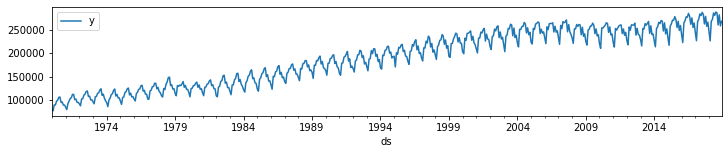

In [ ]:
df.plot(x='ds',y='y',figsize=(12,2))

In [ ]:
len(df)

588

In [ ]:
len(df)-12

576

In [ ]:
train = df.iloc[:576]
test = df.iloc[576:]

In [ ]:
m = Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94162.298231,69624.074681,80927.515874,94162.298231,94162.298231,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,-18588.461143,0.0,0.0,0.0,75573.837088
1,1970-02-01,94474.349513,61677.212614,73209.646503,94474.349513,94474.349513,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,-27100.441623,0.0,0.0,0.0,67373.907890
2,1970-03-01,94756.202283,88876.074737,100883.727763,94756.202283,94756.202283,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,-26.118264,0.0,0.0,0.0,94730.084020
3,1970-04-01,95068.253565,89548.960335,100698.067245,95068.253565,95068.253565,34.728408,34.728408,34.728408,34.728408,34.728408,34.728408,0.0,0.0,0.0,95102.981973
4,1970-05-01,95370.238676,99380.423010,110716.624186,95370.238676,95370.238676,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,9620.483640,0.0,0.0,0.0,104990.722316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,263410.800604,274302.463547,285454.486171,263360.514393,263472.615324,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,0.0,0.0,0.0,279858.813654
584,2018-09-01,263552.915940,256082.112938,268106.294717,263473.798007,263649.354048,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,0.0,0.0,0.0,261882.497404
585,2018-10-01,263690.446911,263383.810688,274898.912725,263578.666071,263810.811203,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,0.0,0.0,0.0,268995.952784
586,2018-11-01,263832.562247,250135.172668,261029.437834,263677.519971,263980.595949,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,0.0,0.0,0.0,255623.575305


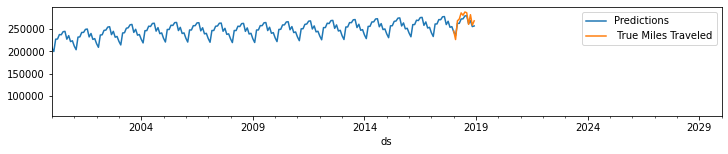

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,2))
test.plot(x='ds',y='y',label=' True Miles Traveled',legend=True,ax=ax,xlim=('2000-01-01','2030-01-01'))

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
len(df)

588

In [ ]:
len(df)/12

49.0

In [ ]:
# Intital 5 years training model 
initial = 5* 365 
initial = str(initial) + 'days'

# Fold every 5 years

period = 5 * 365 
period = str(period) + 'days'

# Forecast 1 year into the future

horizon = 365 
horizon = str(horizon) + 'days'

In [ ]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087306,107041.208605,109895.479441,102445.0,1976-12-11
1,1977-02-01,102996.111502,101630.124585,104406.437383,102416.0,1976-12-11
2,1977-03-01,118973.317944,117506.986319,120391.419596,119960.0,1976-12-11
3,1977-04-01,120612.923539,119138.411722,122089.704881,121513.0,1976-12-11
4,1977-05-01,127883.031663,126375.252213,129375.476758,128884.0,1976-12-11
...,...,...,...,...,...,...
103,2017-08-01,273614.230765,268218.153124,279604.776511,283184.0,2016-12-01
104,2017-09-01,255737.189562,250065.143458,261731.990151,262673.0,2016-12-01
105,2017-10-01,262845.616157,257891.667867,269130.756455,278937.0,2016-12-01
106,2017-11-01,249500.895087,243733.220753,254890.428858,257712.0,2016-12-01


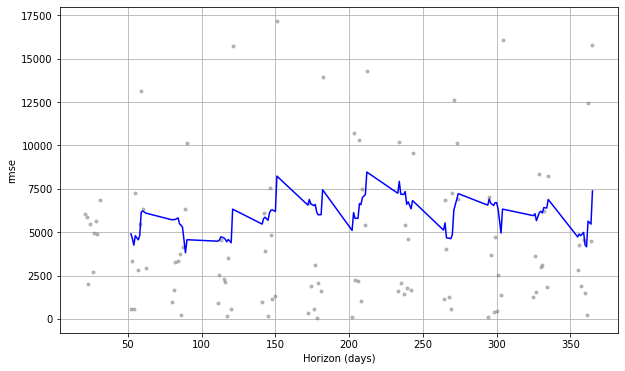

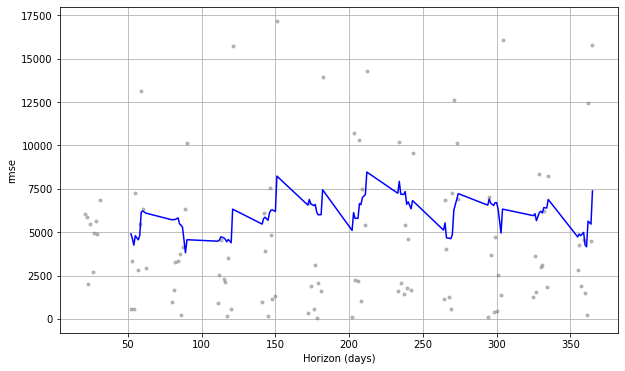

In [ ]:
import numpy as np

plot_cross_validation_metric(df_cv,metric='rmse')